In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
df = df.dropna()
df.shape

(5332, 12)

In [7]:
#convert data_added column to data frame format
df['date_added'] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

C:\Users\rveab\AppData\Local\Temp\ipykernel_9784\1196868665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = pd.to_datetime(df['date_added'])
C:\Users\rveab\AppData\Local\Temp\ipykernel_9784\1196868665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_added'] = df['date_added'].dt.day
C:\Users\rveab\AppData\Local\Temp\ipykernel_9784\1196868665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [8]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
day_added                int64
month_added              int64
year_added               int64
dtype: object

In [9]:
df_movies=df[df["type"]=="Movie"]
df_tvshows=df[df["type"]=="TV Shows"]

In [10]:
df.type.value_counts()

Movie      5185
TV Show     147
Name: type, dtype: int64

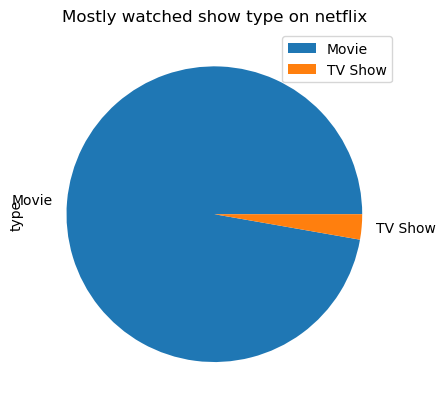

In [11]:
df.type.value_counts().plot(kind='pie')
plt.title("Mostly watched show type on netflix")
plt.legend()
plt.show()

In [12]:
df.director.value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Name: director, dtype: int64

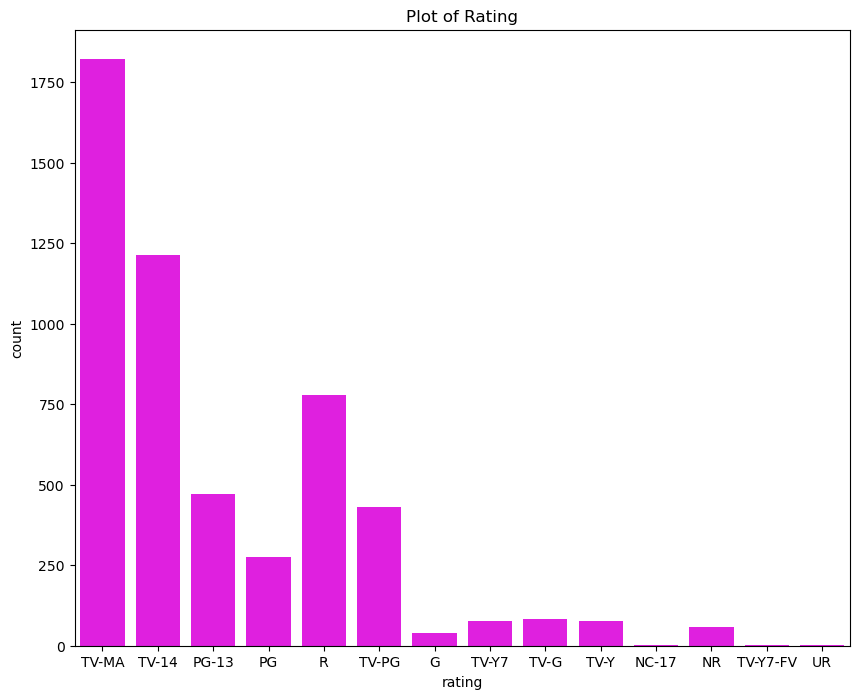

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='rating', color='magenta')
plt.title("Plot of Rating")
plt.show()


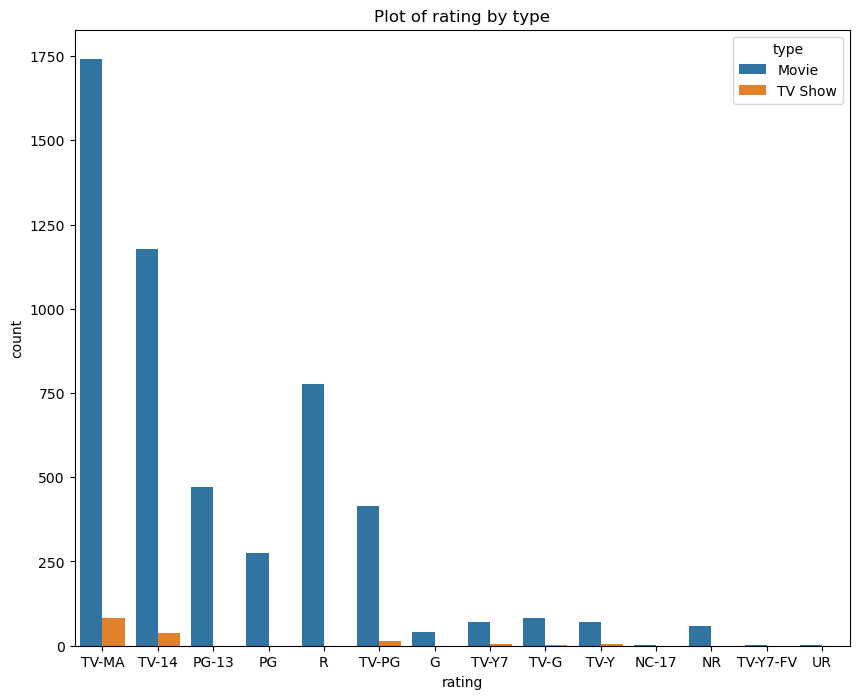

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title("Plot of rating by type")
plt.show()

In [16]:
df.country.value_counts()

United States                                   1846
India                                            875
United Kingdom                                   183
Canada                                           107
Spain                                             91
                                                ... 
Uruguay, Guatemala                                 1
Romania, Bulgaria, Hungary                         1
Philippines, United States                         1
India, United Kingdom, Canada, United States       1
United Arab Emirates, Jordan                       1
Name: country, Length: 604, dtype: int64

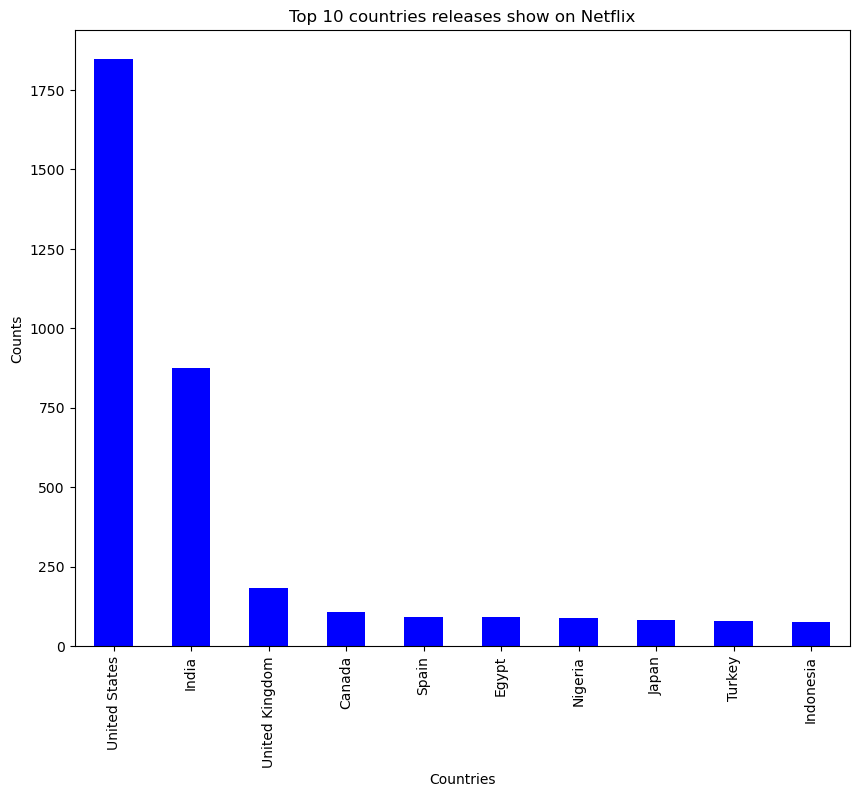

In [17]:
plt.figure(figsize=(10,8))
df.country.value_counts().head(10).plot(kind='bar',color='blue')
plt.title("Top 10 countries releases show on Netflix")
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.show()

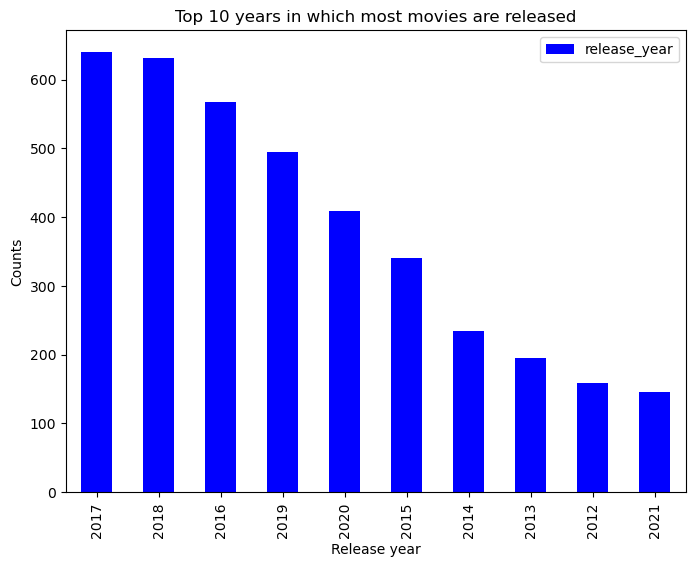

In [18]:
plt.figure(figsize=(8,6))
df_movies.release_year.value_counts().head(10).plot(kind='bar',color='blue')
plt.title("Top 10 years in which most movies are released")
plt.xlabel("Release year")
plt.ylabel("Counts")
plt.legend()
plt.show()

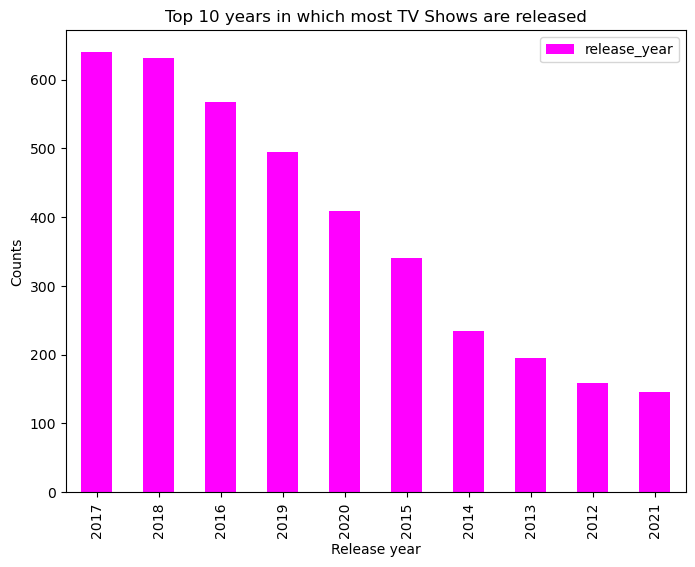

In [19]:
plt.figure(figsize=(8,6))
df_movies.release_year.value_counts().head(10).plot(kind='bar',color='magenta')
plt.title("Top 10 years in which most TV Shows are released")
plt.xlabel("Release year")
plt.ylabel("Counts")
plt.legend()
plt.show()

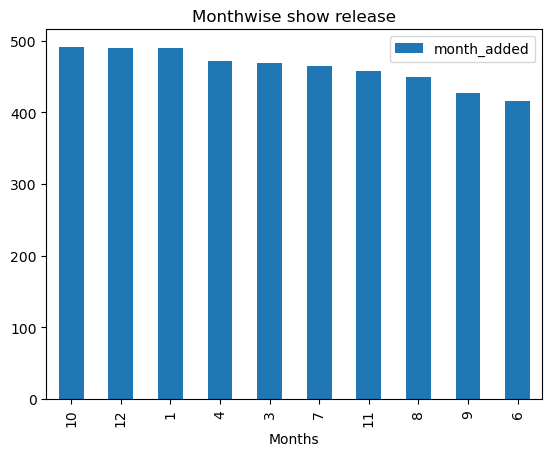

In [20]:
df['month_added'].value_counts().head(10).plot(kind='bar')
plt.title("Monthwise show release")
plt.legend()
plt.xlabel("Months")
plt.show()

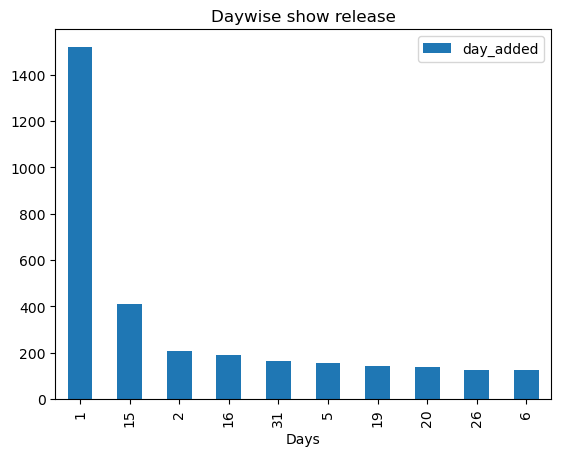

In [21]:
df['day_added'].value_counts().head(10).plot(kind='bar')
plt.title("Daywise show release")
plt.legend()
plt.xlabel("Days")
plt.show()

In [22]:
listed_in=df.listed_in.value_counts()
listed_in

Dramas, International Movies                               336
Stand-Up Comedy                                            286
Comedies, Dramas, International Movies                     257
Dramas, Independent Movies, International Movies           243
Children & Family Movies, Comedies                         179
                                                          ... 
Comedies, Documentaries                                      1
International TV Shows, Romantic TV Shows, TV Mysteries      1
Horror Movies, International Movies, Sci-Fi & Fantasy        1
Reality TV                                                   1
Cult Movies, Dramas, Thrillers                               1
Name: listed_in, Length: 335, dtype: int64

In [23]:
print('Most common category of movie release\nDramas, International Movies :',max(listed_in))

Most common category of movie release
Dramas, International Movies : 336


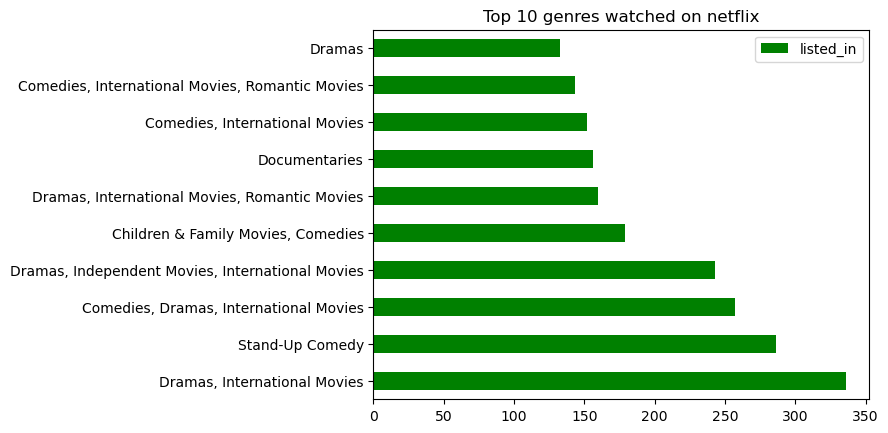

In [24]:
listed_in.head(10).plot(kind='barh',color="g")
plt.title("Top 10 genres watched on netflix")
plt.legend()
